## Problem:

Accurate numerical solutions require high quality meshes. In the case of unstructured triangular meshes (or tetrahedral meshes in 3D), relatively large and small angles can lead to discretization errors. 
- Large angles can cause interpolation errors, while 
- small angles can lead to ill-conditioned stiffness matrices.

## Identification:

Some common 2D quality measures are implemented in `pygimli.meshtools` and will be used in this tutorial.  
In 3D, we recommend to export the mesh in `VTK` format and inspect mesh quality with `ParaView` (Filters -> Alphapetical -> Mesh quality).

## Solution:

Meshes can be improved by adjusting cell sizes (_area_ keyword) and the minimum allowed angle (_quality_ keyword).  
`Gmsh` and other more advanced meshing tools also provide powerful mesh optimization algorithms.  
However, the numerical accurary may be improved at the expense of increased cell counts and thus longer computation times.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pygimli as pg
from pygimli.meshtools import polytools as plc
from pygimli.meshtools import quality

In [2]:
# We start by creating a mesh with a refined object inside.

world = plc.createWorld(start=[-10, 0], end=[10, -10], marker=1,
                        worldMarker=False)
c1 = plc.createCircle(pos=[0.0, -5.0], radius=3.0, area=.3)

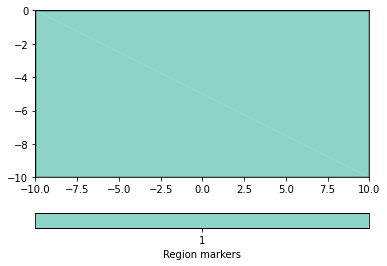

In [11]:
pg.viewer.show(world)
pg.wait()

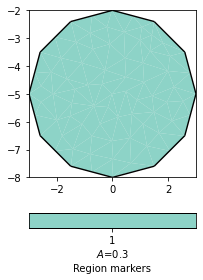

In [12]:
pg.viewer.show(c1)
pg.wait()

When calling the `pg.meshtools.createMesh()` function, a quality parameter can be forwarded to `Triangle`, which prescribes the minimum angle allowed in the final mesh.  
We can asses its effectiveness by creating different meshes and plotting the resulting quality.  
For this purpose, we define a `showQuality` function, which also plots a histogram of the mesh qualities.

14/06/20 - 18:16:55 - pyGIMLi - WARNING - Keyword argument name changed from 'cmap' to 'cMap'
14/06/20 - 18:16:55 - pyGIMLi - WARNING - Keyword argument name changed from 'cmap' to 'cMap'
14/06/20 - 18:16:56 - pyGIMLi - WARNING - Keyword argument name changed from 'cmap' to 'cMap'


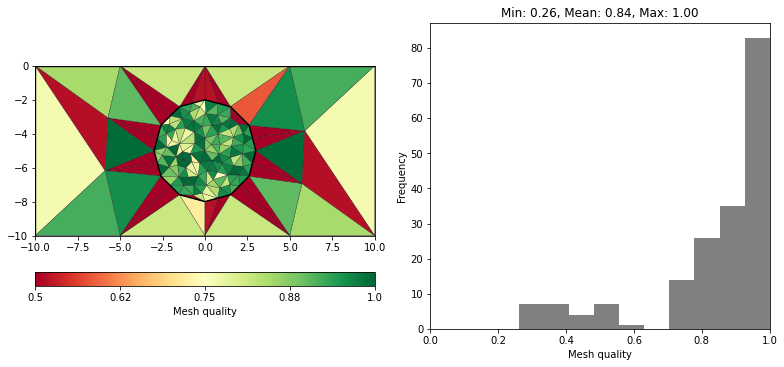

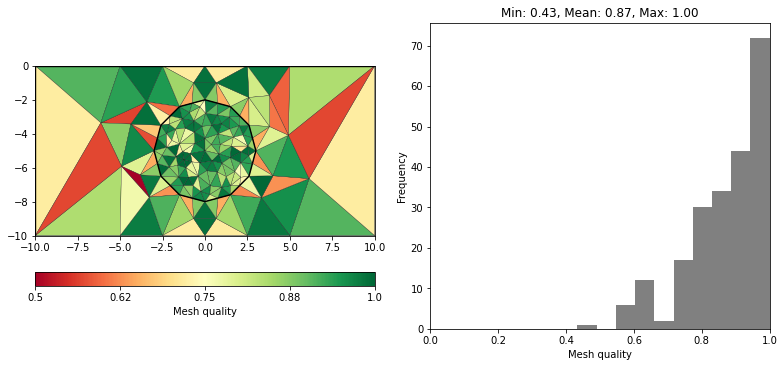

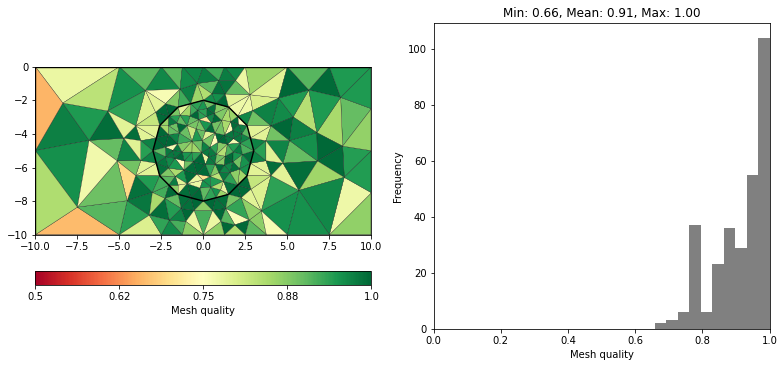

In [8]:
def showQuality(mesh, qualities):
    fig, axes = plt.subplots(1, 2, figsize=(11, 8))
    axes[1].hist(qualities, color="grey")
    pg.show(mesh, qualities, ax=axes[0], cMin=0.5, cMax=1, hold=True,
            logScale=False, label="Mesh quality", cmap="RdYlGn", showMesh=True)
    s = "Min: %.2f, Mean: %.2f, Max: %.2f" % (
        np.min(qualities), np.mean(qualities), np.max(qualities))
    axes[1].set_title(s)
    axes[1].set_xlabel("Mesh quality")
    axes[1].set_ylabel("Frequency")
    axes[1].set_xlim(0, 1)

    # Figure resizing according to mesh dimesions
    x = mesh.xmax() - mesh.xmin()
    y = mesh.ymax() - mesh.ymin()
    width, height = fig.get_size_inches()
    fig.set_figheight(height * 1.3 * (y / x))
    fig.tight_layout()


for q in 10, 20, 30:
    m = pg.meshtools.createMesh([world, c1], quality=q)
    showQuality(m, quality(m))

Note that there is a decreasing number of problematic triangles (marked in red). However, the number of cells is increased siginficantly to achieve this.

More on quality measures https://www.pygimli.org/_tutorials_auto/1_basics/plot_6-mesh-quality-inspection.html